In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from paraspec import ParapatricSpeciationModel

%matplotlib inline

# Run the model in a static landscape

In [2]:
length = (25, 25)
spacing = (1, 1)

X, Y = np.meshgrid(*[np.arange(0, l+s, s)
                     for l, s in zip(length, spacing)])

r = np.random.RandomState(0)

elevation = Y * 100 + r.rand(*X.shape) 

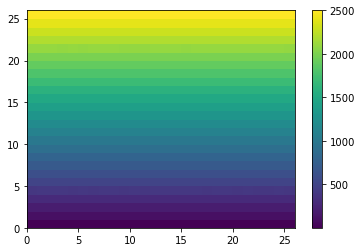

In [3]:
plt.pcolormesh(elevation)
plt.colorbar();

In [4]:
pop_size = 100

model = ParapatricSpeciationModel(X, Y, pop_size,
                                  nb_radius=5, capacity=28,
                                  sigma_w=50, sigma_d=0.5, sigma_mut=50,
                                  lifespan=1, m_freq=0.05, random_seed=1234)

model.initialize_population([elevation.min(), elevation.max()])

dfs = []

for step in range(50):
    model.evaluate_fitness(elevation, 5)

    if step % 5 == 0:
        dfs.append(model.to_dataframe())
    
    model.update_population(5)
    
population = pd.concat(dfs)

In [5]:
population.head()

,step,time,id,parent,x,y,trait,r_d,opt_trait,fitness,n_offspring
0,0,0.0,0,0,4.787986,19.177916,2448.556895,2.153846,1900.505866,8.148318e-27,0
1,0,0.0,1,1,15.552719,17.702884,2203.946592,2.333333,1800.131289,6.858006e-15,0
2,0,0.0,2,2,10.943193,19.921680,1569.827436,3.500000,2000.342611,7.966804e-17,0
3,0,0.0,3,3,19.633965,13.944021,2327.129581,2.000000,1400.820767,2.957305e-75,0
4,0,0.0,4,4,19.499395,24.145913,1812.690714,3.500000,2400.399802,9.971625e-31,0


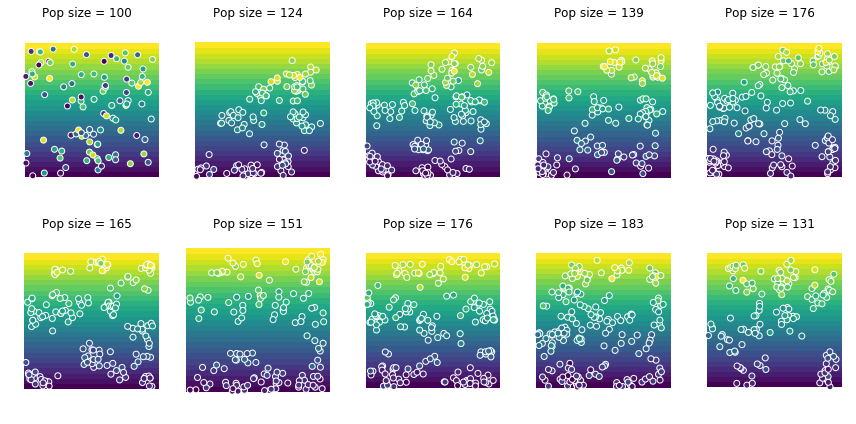

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for ax, (_, pop) in zip(axes.ravel(), population.groupby('step')):
    ax.pcolormesh(elevation)
    ax.scatter(pop.x, pop.y, c=pop.trait, edgecolor='w')
    ax.set_title(f'Pop size = {len(pop)}')
    ax.axis('equal')
    ax.axis('off')

fig.tight_layout()